We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [142]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-20 12:38:08--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:7c00:1d:d83a:40c0:93a1, 2600:9000:21c7:ee00:1d:d83a:40c0:93a1, 2600:9000:21c7:bc00:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:7c00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [143]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [144]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-18,18,5,2020,262,1,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-17,17,5,2020,0,0,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-16,16,5,2020,1063,32,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-15,15,5,2020,113,6,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-14,14,5,2020,259,3,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia


Last check of our source dataframe.

In [145]:
df.count()

dateRep                    18203
day                        18203
month                      18203
year                       18203
cases                      18203
deaths                     18203
countriesAndTerritories    18203
geoId                      18203
countryterritoryCode       18203
popData2018                18203
continentExp               18203
dtype: int64

We pivot to a country by column format.

In [146]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                          ...  \
geoId         AD     AE      AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                   ...   
2019-12-31   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0     0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...     ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-16   0.0  747.0  1063.0  0.0  0.0  18.0  184.0  0.0  345.0  63.0  ...   
2020-05-17   0.0  796.0     0.0  0.0  0.0  17.0  239.0  0.0  326.0  72.0  ...   
2020-05-18   0.0  731.0   262.0  0.0  0.0  13.0  189.0  0.0    0.0  14.0  ...   
2020-05-19   0.0  832.0   408.0  0.0  0.0   2.0  351.0  0.0  566.0  25.0  ...   
2020-05-20   0.0  873.0   581.0  0.0  0.0   1.0  218.0  2.0  438.0  78.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-16    0.0  0.0  0.0  0.0  0.0  0.0  2.0   9.0  0.0  0.0  
2020-05-17    0.0  0.0  0.0  0.0  0.0  0.0  4.0  14.0  0.0  0.0  
2020-05-18    0.0  0.0  0.0  0.0  0.0  0.0  1.0   3.0  0.0  0.0  
2020-05-19    0.0  0.0  0.0  0.0  0.0  0.0  0.0  22.0  0.0  0.0  
2020-05-20    0.0  0.0  0.0  0.0  0.0  0.0  8.0  26.0  0.0  0.0  

[142 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [147]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [148]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak usually fits a gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. Before fitting we have to find out how far a country has come along the curve. We use the residuals of a fit along the double logarithm, which should approach a straight line.

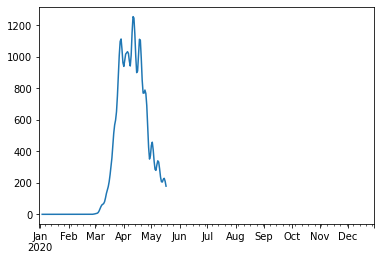

In [149]:
country  = 'NL'
measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

df_geo[(smeasure, country)] = df_geo[measure][country].rolling(
    7, win_type='hann', center=True).mean()

df_pred = pd.DataFrame({
    'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
df_pred[measure].plot()

To ignore early outbreaks and long tails, we define the minimum case count as one in million and find the current total number of cases for scaling.

In [150]:
popdata = df[df['geoId'] == country]['popData2018'].iloc[0]
mincases = popdata / 1e6
maxcases = df_pred[measure].cumsum().max()
print(mincases, maxcases)

17.231017 43844.16666666666


From our dataframe we select only the days with cases above the minimum and create a column with cumulative data for fitting the gumbel distribution, which is cumulative.

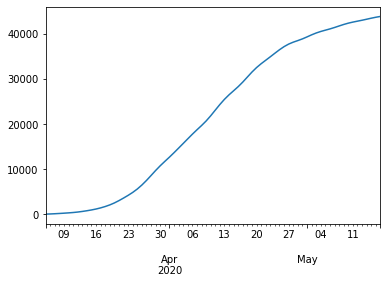

In [151]:
df_pred = df_pred[df_pred[measure] > mincases]
df_pred['cumul'] = df_pred[measure].cumsum()
df_pred['cumul'].plot()

For correct scaling of the data we need to find the current progress of the outbreak, in other words, what part of the distribution we wil try to fit. The function below takes a progress as input and determines the fit for that progress, returning the residuals as a measure of fit quality.

Preparing for the fit, we normalize our input and scale with the current number for progress. Preventing numerical errors we select cases below one, taking the double negative logarithm after we make sure the input is at least larger than 4 measures, to prevent spurious fits. (Such as fitting on just two measures, which would be perfect but not relevant.)

In [152]:
def fitres(progress):
    global df_pred, fit
    
    df_pred['scaled'] = df_pred['cumul'] / maxcases * progress
    df_pred = df_pred[df_pred['scaled'] < 1]
    
    if len(df_pred) > 4:
        df_pred['linear'] = - np.log(- np.log(df_pred['scaled']))
        fit = np.polyfit(x=df_pred['daynum'], y=df_pred['linear'], deg=1, full=True)
        print('Progress {:11.9f} gives {:12.9f}'.format(progress[0], fit[1][0]))
        return(fit[1][0])
    else:
        return 99

An optimizer can call the function repeatedly to find the input that returns the best output. In this case `minimize` will find the progress that returns the lowest residuals, indicating the best fit. We use a least squares method that searches from 1 to any number between 0.1 and 1. If a country is at less than 10% of progress the numbers will not likely produce a relevant curve.

In [153]:
from scipy.optimize import minimize

optim = minimize(fitres, 1, method='SLSQP', bounds=[(0.1, 1)])

Progress 1.000000000 gives 19.877636977
Progress 1.000000000 gives 19.877636977
Progress 1.000000015 gives 19.877788600
Progress 0.100131256 gives  1.469874246
Progress 0.549159268 gives  2.143604196
Progress 0.773704820 gives  1.386461029
Progress 0.885936417 gives  0.449297947
Progress 0.941997267 gives  0.141186228
Progress 0.969995251 gives  0.852440986
Progress 0.984000618 gives  2.486206784
Progress 0.984000618 gives  2.486206784
Progress 0.984000633 gives  2.486209801
Progress 0.983675778 gives  2.421458433
Progress 0.983675778 gives  2.421458433
Progress 0.983675793 gives  2.421461356
Progress 0.982101850 gives  2.134539906
Progress 0.982101850 gives  2.134539906
Progress 0.982101865 gives  2.134542429
Progress 0.975313183 gives  1.266760536
Progress 0.975313183 gives  1.266760536
Progress 0.975313198 gives  1.266761954
Progress 0.966588249 gives  0.662879733
Progress 0.966588249 gives  0.662879733
Progress 0.966588264 gives  0.662880460
Progress 0.957403857 gives  0.339975150


The optimization gives detailed results, such as the best result in `fun`, the number of fitted measures in `nfev` and the optimal input in `x[0]`. That number is the actual progress, e.g. a result of `0.77` would mean that we estimate the outbreak at 77% of total cases.

In [154]:
progress = optim.x[0]
print(optim)

     fun: 0.12598500064131385
     jac: array([0.00832103])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.93497856])


The `scaled` column contains the scaled cumulative distribution that should look like a gumbel cumulative distribution.

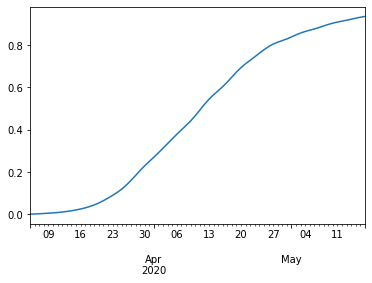

In [155]:
df_pred['scaled'].plot()

The `linear` column contains the line that we try to fit. We can check the fit with `polyval`, applying the linear factors to the input column with day numbers and plotting both `linear` and `fitted` for a visual check.

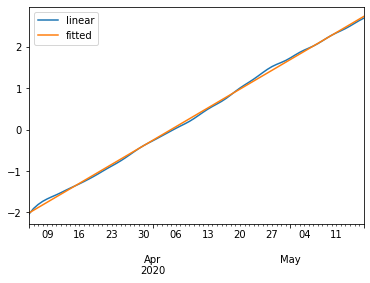

In [156]:
df_pred['fitted'] = np.polyval(fit[0], df_pred['daynum'])
df_pred[['linear', 'fitted']].plot()

From slope and intercept of this line we can calculate beta and mu of the Gumbel distribution.

In [157]:
slope = fit[0][0]
intercept = fit[0][1]
print('Slope {:1.3f} with intercept at {:1.3f}'.format(slope, intercept))
beta = 1 / slope
mu = - intercept * beta
print('Gumbel beta {:1.3f} with mu at {:1.0f}'.format(beta, mu))

Slope 0.065 with intercept at -6.239
Gumbel beta 15.383 with mu at 96


Finished fitting, now back to the original data! Once we have the fitted values, we take the double negative exponential to find the estimated cumulative curve. To reduce that to the orignal curve we take the difference between subsequent values with `shift`.

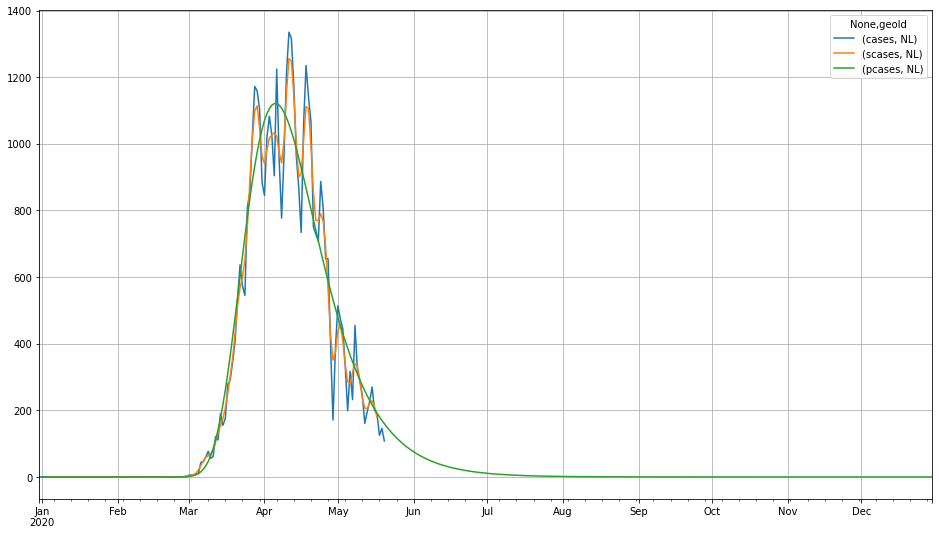

In [158]:
df_geo[(pmeasure, country)] = np.exp(- np.exp(- np.polyval(fit[0], df_geo['daynum']))) * maxcases / progress
df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

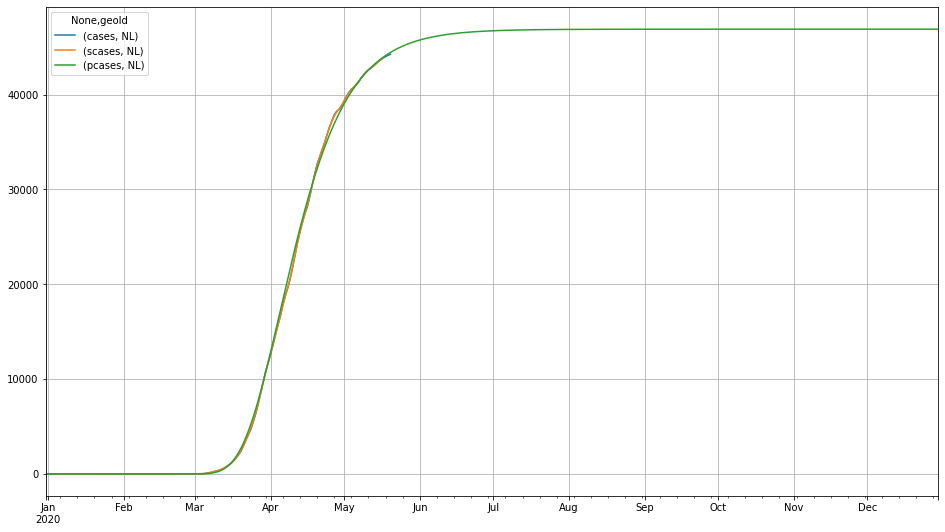

In [159]:
df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

If we look at the difference between our actual (smoothed) value and our prediction, we can clearly see if the curve is breaking out at the end. This can be the result of relaxing of measures and the beginning of a second wave, an increase in testing or other factors.

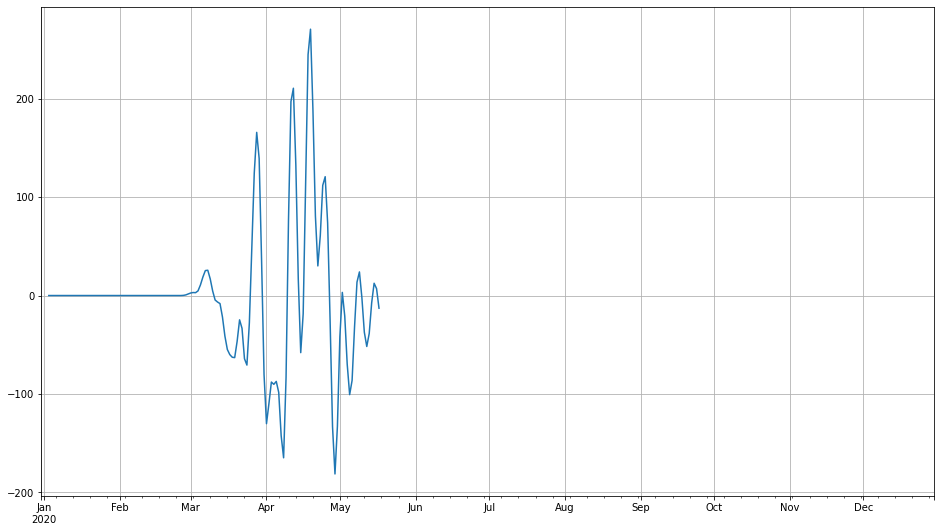

In [160]:
(df_geo[(smeasure, country)] - df_geo[(pmeasure, country)]).plot(figsize=(16, 9), grid=True)

The end value of the cumulative data would be the estimated total number.

In [161]:
total = df_geo[pmeasure][country].cumsum().max()
print('Total of {:1.0f}'.format(total))

Total of 46893


The peak can be found at the first predicted value that is larger than the next.

In [162]:
peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
print('Peak at {}'.format(peak.date()))

Peak at 2020-04-05


The floor is defined as the first time that the number of reported cases falls below 2 in a million, which is the first time that happens *after* the peak.

In [163]:
floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 5e5)) & (
    df_geo[(pmeasure, country)].index > peak)].index.min()
print('Floor at {}'.format(floor.date()))

Floor at 2020-06-14


Similarly, we can calculate the start as the first day where the number of cases was above 2 in a million before the peak.

In [164]:
start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 5e5)) & (
    df_geo[(pmeasure, country)].index < peak)].index.min()
print('Start at {}'.format(start.date()))

Start at 2020-03-09


We define the maximum delta as the day in the curve with the sharpest rise.

In [165]:
maxrise = (df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()).max()
maxdelta = df_geo[(df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()) == (
    maxrise)].index.min()
print('Largest rise of {:1.0f} on {}'.format(maxrise, maxdelta.date()))

Largest rise of 61 on 2020-03-22


Keep exploring! Stay home, wash your hands, keep your distance.